<a href="https://colab.research.google.com/github/farnoosh27/LDAvis-TopicModelling/blob/main/ShareYourCode_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Dirichlet Allocation (LDA) algorithm
## Introduction
**Latent:**
In this context, "latent" refers to something that is not directly observable or apparent. In LDA, the "latent" part refers to the hidden topics that the model aims to discover from a collection of documents.

**Dirichlet:**
The [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution),after Peter Gustav Lejeune Dirichlet, is a mathematical distribution used to model distributions over probabilities of events. In LDA, the Dirichlet distribution is used to model the distribution of topics in documents and the distribution of words in topics.

**Allocation:**
In LDA, "allocation" refers to the process of assigning words in a document to specific topics. Each document is considered as a mixture of topics, and words within the document are "allocated" to different topics based on their estimated probabilities.

![alt text](https://raw.githubusercontent.com/farnoosh27/LDAvis-TopicModelling/main/Slide3.jpg)


## Code
This code that I want to share is an example of using the Gensim library to perform topic modeling and visualize them for a given set of tweets. It uses the Latent Dirichlet Allocation (LDA) algorithm to discover topics within the tweet data.

In this notebook, I will walk through the tutorial provided at this [link](https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know) and try to run a part of it in GoogleColab.

**Importing Libraries:** importing various necessary libraries, including Gensim, pandas, pyLDAvis, and spacy. These libraries are used for data processing, topic modeling, visualization, and coherence calculation.

**Loading Tweet Data:** The code reads a CSV file containing tweet data using pd.read_csv. The tweets are then converted into a list of tokenized words.

**Creating a Dictionary and Corpus:** The code uses Gensim's Dictionary class to create a mapping from words to their integer IDs (id2word). Then, it constructs the term-document frequency matrix (corpus) using the doc2bow method.

**Building/train LDA Model:** The code builds an LDA model using Gensim's LdaModel class. It specifies various parameters such as the number of topics, random state, chunk size, alpha value, and per-word topics. The model is trained on the tweet corpus.


**Displaying pyLDAVvis:** Then using the pyLDAvis to serve two objectives:
* Better understanding and interpreting individual topics
* Better understanding the relationships between the topics

### Gensim Python Library

Gensim is a Python library available for free and open-source use. Its primary purpose is to transform documents into semantic vectors in a manner that is both computationally efficient and user-friendly.

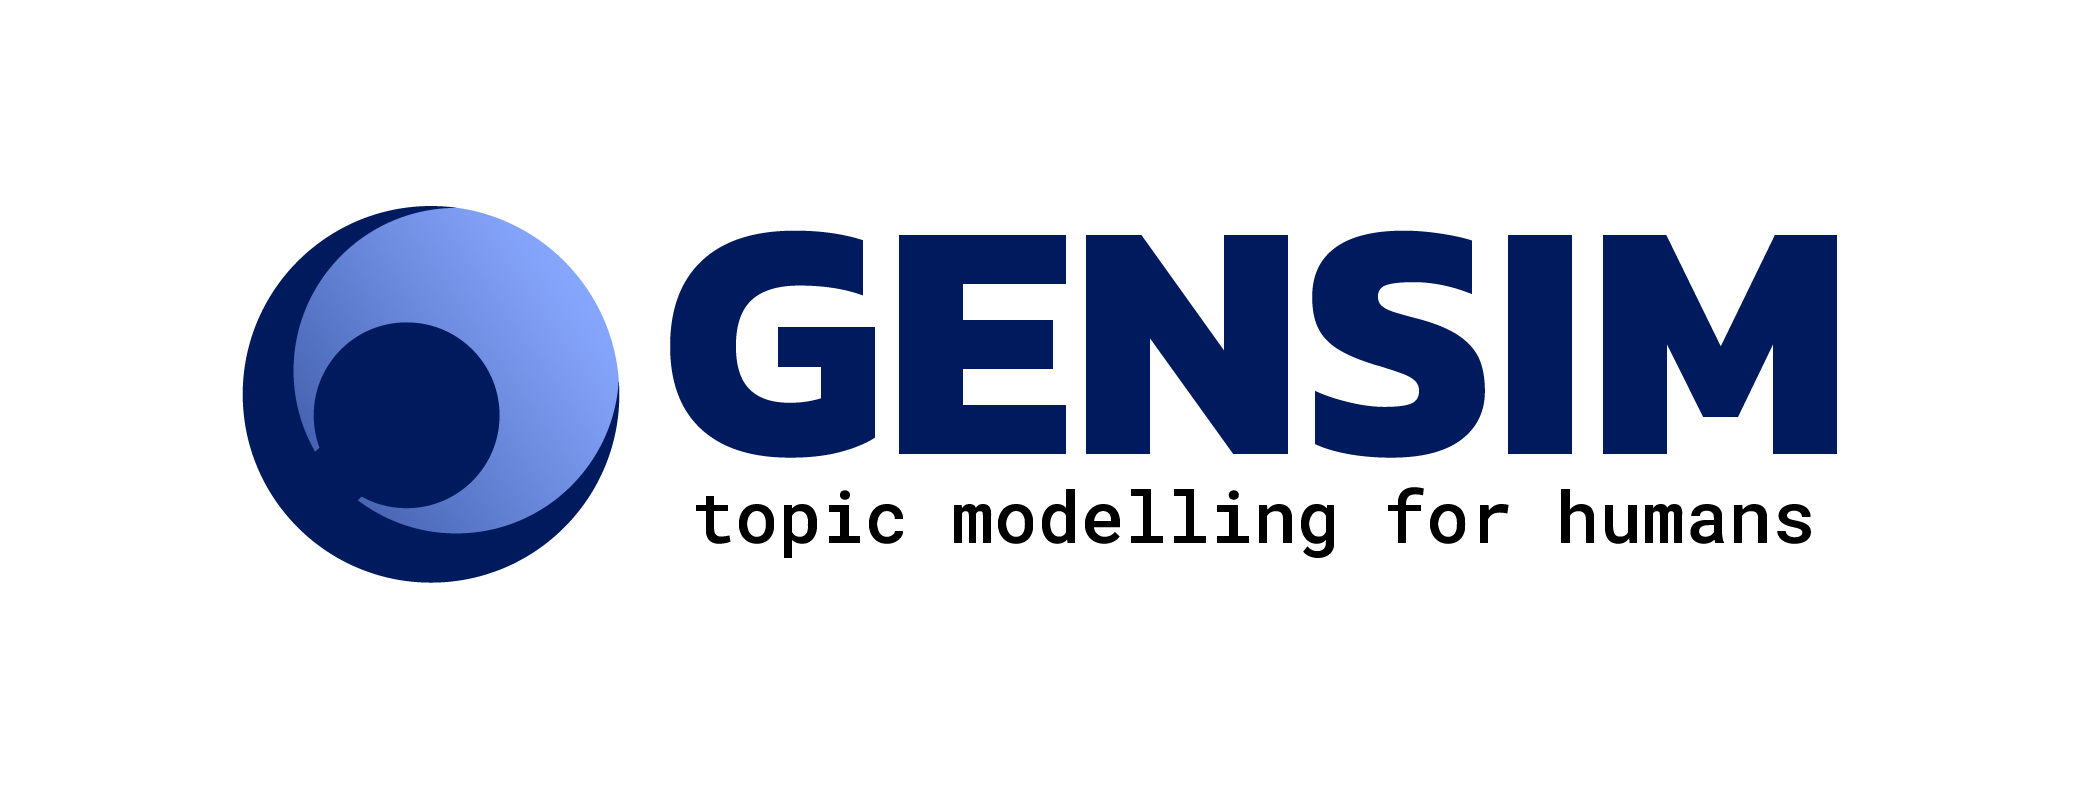


The main focus of Gensim is to handle raw, unstructured digital texts, commonly known as "plain text," using machine learning techniques without the need for supervised guidance.





## Installing Dependencies

In [ ]:
%pip install NLTK
%pip install pyldavis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## How does LDA Algorithm work?


**Algorithm Steps:**

For each document:

1. Randomly assign each word in the document to one of the topics.
2. Count the number of words assigned to each topic across all documents.

For each word in each document:

1. Estimate the probability of the word belonging to each topic based on the current topic assignments and the overall topic-word distribution.
2. Reassign the word to a new topic based on these probabilities.
3. Repeat the previous step for multiple iterations, allowing the topics to evolve and stabilize.

**Result:**

After the algorithm converges (reaches a stable state), you end up with two main sets of outputs:

- **Document-topic distribution**: How much of each topic is present in each document.
- **Topic-word distribution**: The probability of each word belonging to each topic.

**Interpretation:**

Analyze the resulting distributions to interpret the topics. The words with the highest probabilities within a topic give you an idea of what that topic represents.


## Importing the relevant libraries

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import spacy
import pickle
import re
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


If you face ```AttributeError: module 'numpy' has no attribute '_no_nep50_warning``` error, please restart and run all the notebook again.

## Downloading the tweets data

In [ ]:
# the latest version of the tweets
#tweets = pd.read_csv('/content/gdrive/MyDrive/LDA/dp-export-77711e6c-e900-4724-9d88-06795ddbcd9a.csv')
# the tweets that are used in the tutorial
tweets = pd.read_csv('/content/gdrive/MyDrive/LDA/dp-export-original.csv')

tweets = tweets.Tweets.values.tolist()

# Turn the list of string into a list of tokens
tweets = [t.split(',') for t in tweets]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Removing Symbols and Building the corpus
Topic modeling involves counting words and grouping similar word patterns to describe topics within the data. If the model understands how often words are used and which words tend to appear together, it will find patterns to group different words.

To begin, we convert a set of words into a "bag of words," which is a list of pairs (word_id, word_frequency).






In [ ]:
from gensim.corpora import Dictionary
import re

# Ensure all elements in the tweets list are strings
tweets = [str(tweet) for tweet in tweets]

# Remove symbols from each tweet
cleaned_tweets = [re.sub(r'[^\w\s]', '', tweet) for tweet in tweets]

# Tokenize and remove stop words for each cleaned tweet
tokenized_tweets = [word_tokenize(text) for text in cleaned_tweets]
filtered_tweets = [[word for word in tokens if word.lower() not in extended_stop_words] for tokens in tokenized_tweets]

# Create a Dictionary and Term Document Frequency
id2word = Dictionary(filtered_tweets)
corpus = [id2word.doc2bow(text) for text in filtered_tweets]

# corpus[:1] extracts the bag-of-words representation of the first text.
print(corpus[:1])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 3), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 2), (35, 1), (36, 9), (37, 1), (38, 1), (39, 1), (40, 2), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 2), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 5), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 5), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 5), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 4), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

What do these tuples mean? Let’s convert them into human readable format to understand:

* Let's create a list of word-frequency pairs for the words in the first document's bag-of-words representation.


In [ ]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('absolutely', 1),
  ('aca', 3),
  ('act', 1),
  ('action', 2),
  ('add', 2),
  ('administrative', 1),
  ('affordable', 1),
  ('allow', 1),
  ('amazing', 1),
  ('arrive', 2),
  ('ask', 2),
  ('audits', 1),
  ('av', 1),
  ('avoid', 1),
  ('away', 2),
  ('back', 1),
  ('ball', 1),
  ('baseball', 1),
  ('beget', 2),
  ('begin', 1),
  ('behavior', 1),
  ('believe', 1),
  ('bid', 1),
  ('big', 2),
  ('billy', 1),
  ('board', 1),
  ('bout', 1),
  ('branch', 1),
  ('break', 1),
  ('bring', 1),
  ('brother', 1),
  ('build', 1),
  ('call', 2),
  ('can', 1),
  ('cap', 2),
  ('car', 1),
  ('care', 9),
  ('cell', 1),
  ('certainly', 1),
  ('chair', 1),
  ('change', 2),
  ('chant', 2),
  ('chicken', 1),
  ('child', 1),
  ('chip', 1),
  ('choice', 1),
  ('choke', 1),
  ('chuck', 1),
  ('classification', 1),
  ('close', 1),
  ('come', 2),
  ('community', 2),
  ('compare', 2),
  ('competition', 1),
  ('competitively', 1),
  ('compliant', 1),
  ('conclusion', 1),
  ('conference', 1),
  ('constituent'

We use gensim.models.ldamode [link text](https://radimrehurek.com/gensim/models/ldamodel.html#gensim.models.ldamodel.LdaModel) topic modelling library

## Training the LDAmodel
Using LDA every topic is presented as a distribution of words

In [ ]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=5,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True,
                   iterations=100)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.026*"game" + 0.023*"play" + 0.017*"win" + 0.013*"team" + 0.013*"player" + '
  '0.010*"half" + 0.009*"good" + 0.009*"season" + 0.008*"fan" + 0.007*"go"'),
 (1,
  '0.015*"trump" + 0.010*"say" + 0.009*"people" + 0.007*"think" + 0.006*"need" '
  '+ 0.006*"know" + 0.006*"right" + 0.005*"woman" + 0.005*"vote" + 0.004*"go"'),
 (2,
  '0.044*"more" + 0.025*"today" + 0.010*"life" + 0.010*"feel" + 0.007*"day" + '
  '0.006*"work" + 0.006*"time" + 0.006*"know" + 0.005*"cancer" + 0.005*"fuck"'),
 (3,
  '0.012*"new" + 0.011*"great" + 0.010*"thank" + 0.008*"how" + 0.006*"work" + '
  '0.005*"learn" + 0.005*"change" + 0.005*"need" + 0.005*"late" + '
  '0.004*"look"'),
 (4,
  '0.014*"good" + 0.013*"thank" + 0.012*"love" + 0.011*"go" + 0.011*"day" + '
  '0.010*"time" + 0.009*"look" + 0.009*"year" + 0.008*"think" + 0.008*"great"')]


## pyLDAvis

LDAvis is a Python library that provides an interactive visualization for exploring and interpreting topics generated by Latent Dirichlet Allocation (LDA) models. LDAvis stands for "LDA Visualization."

LDAvis uses the output of an LDA model to create an interactive web-based visualization that allows users to explore and understand the underlying topics in a corpus of text. It provides a visual representation of the topics, their keywords, and their relationships.

The visualization consists of two main components:

1) Topic-Word Circles: The topic-word circles represent the topics as circles, with the area of each circle proportional to the topic's prevalence in the corpus. The circles are positioned in a two-dimensional space based on a dimensionality reduction technique called t-SNE (t-Distributed Stochastic Neighbor Embedding). The words most closely associated with each topic are displayed as a word cloud within each circle.

2) Topic-Term Matrix: The topic-term matrix provides an interactive table that shows the top terms for each topic, along with their frequency and relevance scores. The relevance score represents how important a term is to the topic, considering both the probability of the term in the topic and the exclusivity of the term to the topic.

The visualization allows users to interact with the topics by hovering over the circles to reveal the top terms, clicking on a topic to highlight its terms in the matrix, and exploring the inter-topic distances and similarities. This interactive exploration helps users gain insights into the generated topics, identify overlaps or gaps between topics, and discover relationships among the topics.

LDAvis is a valuable tool for both researchers and practitioners working with topic modeling and natural language processing tasks. It facilitates the interpretation and evaluation of LDA models, enabling users to gain a better understanding of the underlying topics in their text data.



## Visualizations


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.035591 -0.061846       1        1  47.645688
1     -0.076872  0.066847       2        1  24.950091
3     -0.174526  0.086022       3        1  15.616625
2     -0.004052 -0.189205       4        1   7.684057
0      0.219859  0.098181       5        1   4.103540, topic_info=      Term          Freq         Total Category  logprob  loglift
198   more   9533.000000   9533.000000  Default  30.0000  30.0000
623  today  15201.000000  15201.000000  Default  29.0000  29.0000
563   play   6721.000000   6721.000000  Default  28.0000  28.0000
486   game   5291.000000   5291.000000  Default  27.0000  27.0000
628  trump  10139.000000  10139.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
340  think    619.568302  18422.875122   Topic5  -5.2189  -0.1990
369   well    558.004381   8868.239954   Topic5  -5.3235   0.4275
342   time    518.256810  18365.950045   Topic5  -5.3974  -0.3745
133  great    499.712601  16259.533454   Topic5  -5.4338  -0.2891
376   year    469.231245  16339.791602   Topic5  -5.4968  -0.3569

[454 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3272      2  0.997710        abortion
3481      2  0.996450          accuse
3698      2  0.997452  administration
6369      1  0.994860           adore
6369      4  0.005378           adore
...     ...       ...             ...
376       2  0.118729            year
376       3  0.105754            year
376       4  0.028275            year
376       5  0.028703            year
7751      5  0.969863             yer

[1162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

## What is Lambda

λ (Lambda):
In ldavis, λ controls the relevance of terms within a topic. It is a parameter that you can adjust to influence which terms are shown for each topic in the visualization.
* Higher values of λ will prioritize terms that are more strongly associated with the topic, potentially leading to a more focused and coherent representation of the topic.
* Lower values of λ will result in a broader range of terms being displayed for the topic.

## How do I measure the LDA's quality?
Perplexity and Coherence Scores:
 These are quantitative metrics often used to measure the quality of LDA models. Lower perplexity scores and higher coherence scores generally indicate better models.


In [ ]:
from gensim.models import CoherenceModel

# Calculate Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score:', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.3523779795937364


## Helpful links
* **Tutorial**: [pyLDAvis: Topic Modelling Exploration Tool That Every NLP Data Scientist Should Know](https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know)
* **Concept**: [The Dirichlet Distribution: What Is It and Why Is It Useful?](https://builtin.com/data-science/dirichlet-distribution)

* **Tutorial**: Part 2: [Topic Modeling and Latent Dirichlet Allocation (LDA) using Gensim and Sklearn](https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
